## Cat and Dog Classification (SKlearn,OpenCV) and (PyTorch)

**1. Image Classification using OpenCV andSKlearn

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

seed = 42

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_folder = "/kaggle/input/cats-and-dogs-image-classification/train"
test_folder = "/kaggle/input/cats-and-dogs-image-classification/test"

In [3]:
def load_images(folder):
    images = []
    labels = []
    
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        label = 1 if subfolder == 'dogs' else 0
        
        for imagelist in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, imagelist)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (64, 64))
            images.append(image)
            labels.append(label)
                
    return np.array(images), np.array(labels)

In [4]:
train_images, train_labels = load_images(train_folder)
test_images, test_labels = load_images(test_folder)

flat_train_images = train_images.reshape(train_images.shape[0], -1)
flat_test_images = test_images.reshape(test_images.shape[0], -1)

In [5]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=seed),
    'Random Forest': RandomForestClassifier(random_state=seed),
    'Extra Trees': ExtraTreesClassifier(random_state=seed),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'XGBoost': xgb.XGBClassifier(random_state=seed),
    'LightGBM': lgb.LGBMClassifier(random_state=seed)
}


In [6]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(flat_train_images, train_labels)
    pred_labels = model.predict(flat_test_images)
    accuracy = accuracy_score(test_labels, pred_labels)
    accuracy_scores[model_name] = accuracy
    print(f"Accuracy Score of {model_name} model: {accuracy}")

Accuracy Score of Logistic Regression model: 0.6142857142857143
Accuracy Score of Random Forest model: 0.5928571428571429
Accuracy Score of Extra Trees model: 0.6
Accuracy Score of Decision Tree model: 0.6071428571428571
Accuracy Score of XGBoost model: 0.6571428571428571
Accuracy Score of LightGBM model: 0.6071428571428571


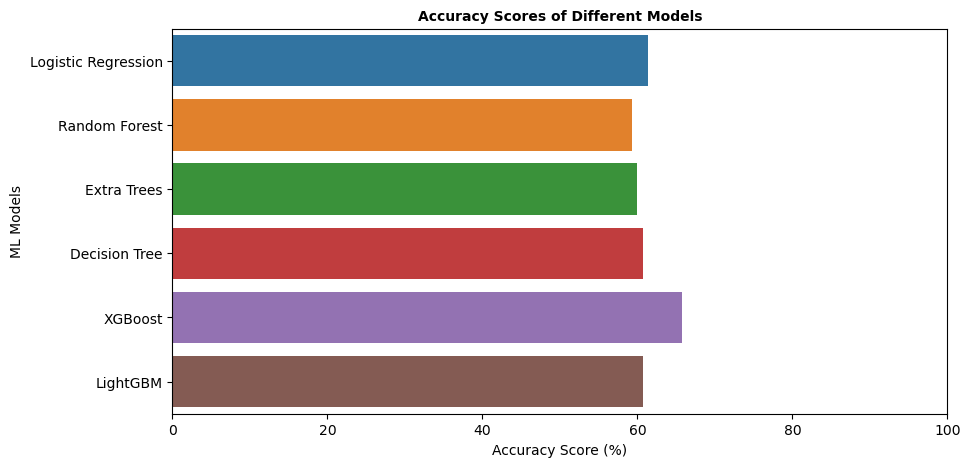

In [7]:
# Visualization of Accuracy Scores
accuracy_scores = {k: v * 100 for k, v in accuracy_scores.items()}
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()), palette='tab10')
plt.xlim(0, 100)
plt.xlabel('Accuracy Score (%)')
plt.ylabel('ML Models')
plt.title('Accuracy Scores of Different Models', fontsize=10, fontweight='bold')
plt.show()

** 2. Image Classification using PyTorch

In [8]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
train_dir = "/kaggle/input/cats-and-dogs-image-classification/train"
test_dir = "/kaggle/input/cats-and-dogs-image-classification/test"

In [10]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

In [11]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)  # Adjust the input size based on your architecture
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)  # Output size 2 for binary classification
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        return out


In [12]:
model = CNNModel().to(device)

error = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 25

In [13]:
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {epoch_loss:.4f}")

Epoch [1/25] Loss: 12.5592
Epoch [2/25] Loss: 12.3908
Epoch [3/25] Loss: 12.0683
Epoch [4/25] Loss: 11.7825
Epoch [5/25] Loss: 10.8446
Epoch [6/25] Loss: 10.7336
Epoch [7/25] Loss: 9.8519
Epoch [8/25] Loss: 8.8490
Epoch [9/25] Loss: 8.8041
Epoch [10/25] Loss: 7.5051
Epoch [11/25] Loss: 6.6745
Epoch [12/25] Loss: 6.1198
Epoch [13/25] Loss: 5.0967
Epoch [14/25] Loss: 5.3614
Epoch [15/25] Loss: 4.2980
Epoch [16/25] Loss: 4.1279
Epoch [17/25] Loss: 2.7752
Epoch [18/25] Loss: 2.1707
Epoch [19/25] Loss: 1.8268
Epoch [20/25] Loss: 1.5070
Epoch [21/25] Loss: 1.0293
Epoch [22/25] Loss: 0.8739
Epoch [23/25] Loss: 0.8715
Epoch [24/25] Loss: 0.8660
Epoch [25/25] Loss: 0.5612


In [14]:
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy_cnn = accuracy_score(true_labels, predictions)
print(f"Accuracy of CNN: {accuracy_cnn:.2f}")

Accuracy of CNN: 0.64


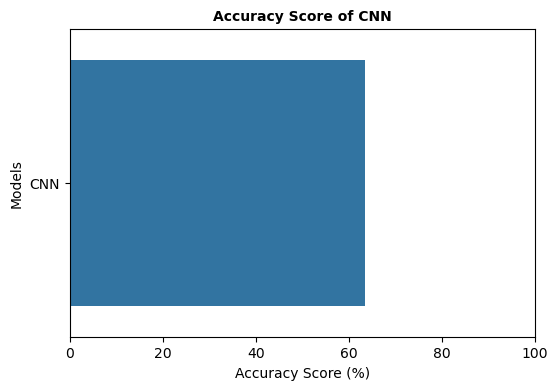

In [15]:
# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=[accuracy_cnn * 100], y=['CNN'], palette='tab10')
plt.xlim(0, 100)
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Models')
plt.title('Accuracy Score of CNN', fontsize=10, fontweight='bold')
plt.show()

**Conclusion**

The cats and dogs image dataset is preprocessed, feature extracted and evaluated with SKlearn package and compared with a custom model using CNN in PyTorch framework.

* Accuracy (SKlearn) - **XGBoost**  = **65.71%**
* Accuracy (PyTorch) - **CNN**      = **64 %**

Accuracy Score of Random Forest model: 0.6696428571428571
Accuracy Score of Extra Trees model: 0.6517857142857143
Accuracy Score of Decision Tree model: 0.5178571428571429
Accuracy Score of XGBoost model: 0.625
Accuracy Score of LightGBM model: 0.6428571428571429


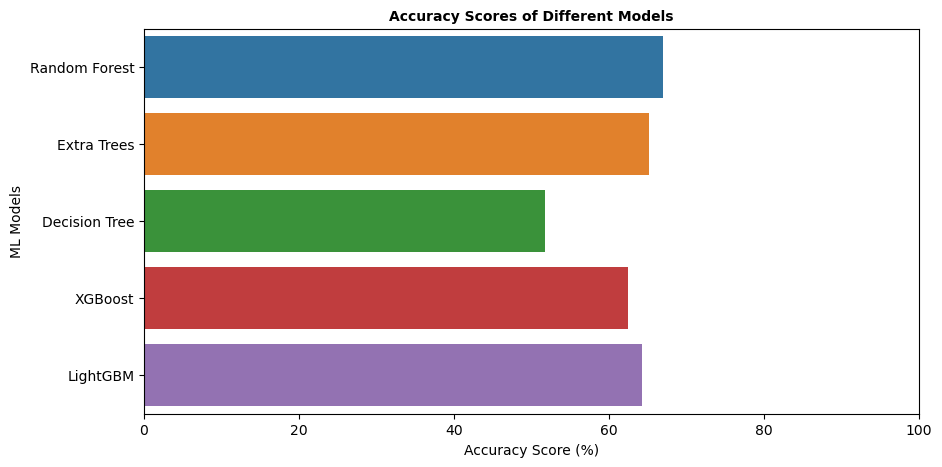

Accuracy Score on Test Set using Random Forest: 0.5928571428571429


In [16]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

seed = 42
train_folder = "/kaggle/input/cats-and-dogs-image-classification/train"
test_folder = "/kaggle/input/cats-and-dogs-image-classification/test"

# Load and preprocess images
def load_images(folder):
    images = []
    labels = []

    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        label = 1 if subfolder == 'dogs' else 0

        for imagelist in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, imagelist)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (64, 64))
            images.append(image)
            labels.append(label)

    return np.array(images), np.array(labels)

train_images, train_labels = load_images(train_folder)
test_images, test_labels = load_images(test_folder)

# Flatten and standardize the image data
flat_train_images = train_images.reshape(train_images.shape[0], -1)
flat_test_images = test_images.reshape(test_images.shape[0], -1)

scaler = StandardScaler()
flat_train_images = scaler.fit_transform(flat_train_images)
flat_test_images = scaler.transform(flat_test_images)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(flat_train_images, train_labels, test_size=0.2, random_state=seed)

# Define and train machine learning models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

models = {
    'Random Forest': RandomForestClassifier(random_state=seed),
    'Extra Trees': ExtraTreesClassifier(random_state=seed),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'XGBoost': xgb.XGBClassifier(random_state=seed),
    'LightGBM': lgb.LGBMClassifier(random_state=seed)
}

accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred_labels = model.predict(X_val)
    accuracy = accuracy_score(y_val, pred_labels)
    accuracy_scores[model_name] = accuracy
    print(f"Accuracy Score of {model_name} model: {accuracy}")

# Visualization of Accuracy Scores
accuracy_scores = {k: v * 100 for k, v in accuracy_scores.items()}
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()), palette='tab10')
plt.xlim(0, 100)
plt.xlabel('Accuracy Score (%)')
plt.ylabel('ML Models')
plt.title('Accuracy Scores of Different Models', fontsize=10, fontweight='bold')
plt.show()

# Choose the best model and evaluate on the test set
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
best_model.fit(flat_train_images, train_labels)
test_pred_labels = best_model.predict(flat_test_images)
test_accuracy = accuracy_score(test_labels, test_pred_labels)
print(f"Accuracy Score on Test Set using {best_model_name}: {test_accuracy}")


Epoch [1/25] Loss: 12.5592
Epoch [2/25] Loss: 12.3908
Epoch [3/25] Loss: 12.0683
Epoch [4/25] Loss: 11.7825
Epoch [5/25] Loss: 10.8446
Epoch [6/25] Loss: 10.7336
Epoch [7/25] Loss: 9.8519
Epoch [8/25] Loss: 8.8490
Epoch [9/25] Loss: 8.8041
Epoch [10/25] Loss: 7.5051
Epoch [11/25] Loss: 6.6745
Epoch [12/25] Loss: 6.1198
Epoch [13/25] Loss: 5.0967
Epoch [14/25] Loss: 5.3614
Epoch [15/25] Loss: 4.2980
Epoch [16/25] Loss: 4.1279
Epoch [17/25] Loss: 2.7752
Epoch [18/25] Loss: 2.1707
Epoch [19/25] Loss: 1.8268
Epoch [20/25] Loss: 1.5070
Epoch [21/25] Loss: 1.0293
Epoch [22/25] Loss: 0.8739
Epoch [23/25] Loss: 0.8715
Epoch [24/25] Loss: 0.8660
Epoch [25/25] Loss: 0.5612
Accuracy of CNN on Test Set: 0.64


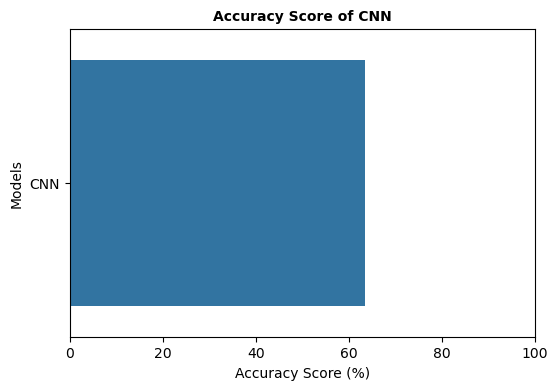

In [17]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
device = "cuda" if torch.cuda.is_available() else "cpu"
train_dir = "/kaggle/input/cats-and-dogs-image-classification/train"
test_dir = "/kaggle/input/cats-and-dogs-image-classification/test"
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)  # Output size 2 for binary classification

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        return out

model = CNNModel().to(device)

error = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 25
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {epoch_loss:.4f}")

model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy_cnn = accuracy_score(true_labels, predictions)
print(f"Accuracy of CNN on Test Set: {accuracy_cnn:.2f}")

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=[accuracy_cnn * 100], y=['CNN'], palette='tab10')
plt.xlim(0, 100)
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Models')
plt.title('Accuracy Score of CNN', fontsize=10, fontweight='bold')
plt.show()

